In [2]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
import pickle
import time

In [4]:
# read metadata
path = "/media/yesindeed/WD5T/data/HAM10000"

demo_data = pd.read_csv(os.path.join(path, "HAM10000_metadata"))
demo_data

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [6]:
Counter(demo_data["dataset"])

Counter({'vidir_molemax': 3954,
         'vidir_modern': 3363,
         'rosendahl': 2259,
         'vienna_dias': 439})

In [7]:
# remove age/sex == null
demo_data = demo_data[~demo_data["age"].isnull()]
demo_data = demo_data[~demo_data["sex"].isnull()]
demo_data

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [8]:
demo_data["dx"].value_counts()

dx
nv       6660
mel      1111
bkl      1089
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

In [9]:
demo_data["sex"].value_counts()

sex
male       5400
female     4548
unknown      10
Name: count, dtype: int64

In [11]:
demo_data.to_csv(os.path.join(path, "all.csv"), index=False)

(450, 600, 3)


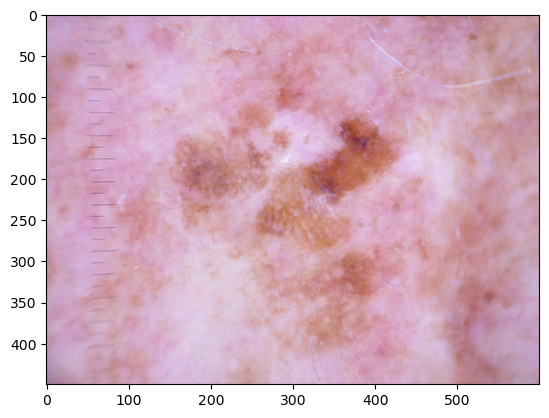

In [10]:
# you can have a look of some examples here
img = cv2.imread("/media/yesindeed/WD5T/data/HAM10000/images/ISIC_0027419.jpg")
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
# spliting according to template

tem_train = pd.read_csv(
    "/home/yesindeed/Documents/Dropbox/HAM10000-split/new_train.csv")
tem_test = pd.read_csv(
    "/home/yesindeed/Documents/Dropbox/HAM10000-split/new_test.csv")

df = pd.read_csv(os.path.join(path, "all.csv"))
df_train = df.loc[df["image_id"].isin(
    tem_train["image_id"])].reset_index(drop=True)
df_test = df.loc[df["image_id"].isin(
    tem_test["image_id"])].reset_index(drop=True)

df_train.to_csv(os.path.join(path, "train.csv"), index=False)
df_test.to_csv(os.path.join(path, "test.csv"), index=False)

In [7]:
# age

tem_test = pd.read_csv("/home/yesindeed/Documents/Dropbox/ham10000_test_age.csv")

df = pd.read_csv(os.path.join(path, "all.csv"))
df_test = df.loc[df["image_id"].isin(tem_test["image_id"])].reset_index(drop=True)

print(tem_test["Age_binary"].value_counts())

df_test.to_csv(os.path.join(path, "test_age.csv"), index=False)

Age_binary
0    531
1    531
Name: count, dtype: int64
